## IST Submission

This notebook extracts corpus keywords and analyse the concepts emerging from three sources: source code, documentation and tests

In [1]:
import code_extract as ce
import doc_extract as de

import pandas as pd
import numpy as np

In [2]:
import spacy

nlp = spacy.load('en_core_web_md')
nlp.max_length = 4000000

In [3]:
dataset_df = pd.read_csv('dataset.csv').set_index('ID') # sorted by  project ID
dataset_df[:15]

,name,url,git url,default branch,commit SHA,stars,timestamp
ID,,,,,,,
P1,dubbo,https://github.com/apache/dubbo,https://github.com/apache/dubbo.git,3.2,502b4c86dffbc0de3863a5e41ed7b9f633450c1c,38.4k,13/02/2022 18:00
P2,skywalking,https://github.com/apache/skywalking,https://github.com/apache/skywalking.git,master,fd78739067b459dfd5474d3948b3cb97bc3cb63b,21.2k,13/02/2022 18:20
P3,flink,https://github.com/apache/flink,https://github.com/apache/flink.git,master,c0aa73df4df4e39c138f2cddaeb8efad6c831d03,20.6k,13/02/2022 19:32
P4,rocketmq,https://github.com/apache/rocketmq,https://github.com/apache/rocketmq.git,develop,2e8ef046465c4133cf0d6ad6f242f630021439b2,18.7k,13/02/2022 19:33
P5,shardingsphere,https://github.com/apache/shardingsphere,https://github.com/apache/shardingsphere.git,master,7d1d1c3cc2bbdd56cb7c245f681fb6666cedaf78,18k,13/02/2022 19:34
P6,hadoop,https://github.com/apache/hadoop,https://github.com/apache/hadoop.git,trunk,90de1ff151ede83a6f963aaf2407d3eb6220ae40,13.2k,13/02/2022 19:36
P7,druid,https://github.com/apache/druid,https://github.com/apache/druid.git,master,f09f83697df5daa5dd52c6f930d12c0c68233776,12.4k,13/02/2022 19:37
P8,pulsar,https://github.com/apache/pulsar,https://github.com/apache/pulsar.git,master,950ff441da28e144bdfb71c317a9bc339d4f05b7,12.3k,13/02/2022 19:38
P9,zookeeper,https://github.com/apache/zookeeper,https://github.com/apache/zookeeper.git,master,2d1bac7e077f49a7149d3fb878a2c73b9e627f6e,11.1k,13/02/2022 19:39


In [4]:
dataset_df[15:30]

,name,url,git url,default branch,commit SHA,stars,timestamp
ID,,,,,,,
P16,nifi,https://github.com/apache/nifi,https://github.com/apache/nifi.git,main,6542505a5071f7bd1152daea5b1763b2af618a74,3.6k,13/02/2022 20:16
P17,shiro,https://github.com/apache/shiro,https://github.com/apache/shiro.git,main,cc9423f1c81609ea126191b5c9eeae9ce6c577b8,4k,13/02/2022 20:17
P18,camel,https://github.com/apache/camel,https://github.com/apache/camel.git,main,bd966028a5983f17dfd1958b1ea3595b094f3002,4.7k,13/02/2022 20:18
P19,commons-jexl,https://github.com/apache/commons-jexl,https://github.com/apache/commons-jexl.git,master,2839f02e39efd6c336534f7ca6446c85fa450901,142,13/02/2022 20:19
P20,cloudstack,https://github.com/apache/cloudstack,https://github.com/apache/cloudstack.git,main,933970d9da0791ae0867ed9c3d2b318b4029660a,1.3k,13/02/2022 20:20
P21,tika,https://github.com/apache/tika,https://github.com/apache/tika.git,main,69f1b6591d7439d8e04edeef1bc58e151669a7d4,1.6k,13/02/2022 20:22
P22,sedona,https://github.com/apache/sedona,https://github.com/apache/sedona.git,master,b0b74295a1899c94fdadf2497ea671111fc4f235,1.4k,13/02/2022 20:24
P23,ctakes,https://github.com/apache/ctakes,https://github.com/apache/ctakes.git,main,088450faf6d4f405dc056079c10abeb880a58be7,14,13/02/2022 20:24
P24,commons-beanutils,https://github.com/apache/commons-beanutils,https://github.com/apache/commons-beanutils.git,master,f7112c90e7b5d72a5e2b9a854d14d748809b738c,234,13/02/2022 20:25


In [5]:
dataset_df[-15:]

,name,url,git url,default branch,commit SHA,stars,timestamp
ID,,,,,,,
P31,turbine-core,https://github.com/apache/turbine-core,https://github.com/apache/turbine-core.git,trunk,e5e1518626813f2a1b17af975a7bf2b134b30eac,3,13/02/2022 20:35
P32,freemarker-docgen,https://github.com/apache/freemarker-docgen,https://github.com/apache/freemarker-docgen.git,master,1af58fabcccd6268be1633e0c4c6b4a188c4ea69,3,13/02/2022 20:38
P33,creadur-whisker,https://github.com/apache/creadur-whisker,https://github.com/apache/creadur-whisker.git,master,09cd1daf1c39852ff6e52d6a40a6f333adbc8566,3,16/02/2022 18:36
P34,maven-jarsigner,https://github.com/apache/maven-jarsigner,https://github.com/apache/maven-jarsigner.git,master,5014079464dbaad87599e0078ec41b0bb7dddfa5,2,16/02/2022 18:35
P35,maven-shared-io,https://github.com/apache/maven-shared-io,https://github.com/apache/maven-shared-io.git,master,f8f263321ab70119eebb16b426e3a38833fa0e42,2,16/02/2022 18:33
P36,jclouds-labs,https://github.com/apache/jclouds-labs,https://github.com/apache/jclouds-labs.git,master,292290287710385d91ae1b8c46a7865f422b06df,2,13/02/2022 20:30
P37,creadur-tentacles,https://github.com/apache/creadur-tentacles,https://github.com/apache/creadur-tentacles.git,master,fcb2e52e03b4632360fa3038a66cb8f1f9c31048,2,13/02/2022 20:32
P38,accumulo-classloaders,https://github.com/apache/accumulo-classloaders,https://github.com/apache/accumulo-classloader...,main,581b3fd198cd6b451d85c00f5c600598eac11f6e,1,16/02/2022 18:29
P39,datasketches-server,https://github.com/apache/datasketches-server,https://github.com/apache/datasketches-server.git,main,12f4509e12a45d415e3e771e42329f9d19bec801,1,16/02/2022 18:31


In [6]:
# text to remove from repositories: name of org (apache) and project

def split_hyphen(word):
    if '-' in word:
        return word.split('-')
    return [word]

def flatten(list_of_list):
    return [x for y in list_of_list for x in y]

proj_names = dataset_df['name'].tolist()
proj_names = [[['apache'],split_hyphen(x)] for x in proj_names]
proj_names = [flatten(x) for x in proj_names]

proj_names[:15]

[['apache', 'dubbo'],
 ['apache', 'skywalking'],
 ['apache', 'flink'],
 ['apache', 'rocketmq'],
 ['apache', 'shardingsphere'],
 ['apache', 'hadoop'],
 ['apache', 'druid'],
 ['apache', 'pulsar'],
 ['apache', 'zookeeper'],
 ['apache', 'dolphinscheduler'],
 ['apache', 'shardingsphere', 'elasticjob'],
 ['apache', 'shenyu'],
 ['apache', 'tomcat'],
 ['apache', 'storm'],
 ['apache', 'zeppelin']]

In [7]:
import os

# we will have to define the module folders present in each repo manually, as they are not arranged uniformly

repo_folder_names = dataset_df["name"].tolist()

modules_dir = [
    ['dubbo-build-tools','dubbo-cluster','dubbo-common','dubbo-compatible','dubbo-compiler','dubbo-config','dubbo-configcenter','dubbo-container','dubbo-demo','dubbo-dependencies','dubbo-filter','dubbo-kubernetes','dubbo-metadata','dubbo-metrics','dubbo-monitor','dubbo-native','dubbo-native-plugin','dubbo-plugin','dubbo-registry','dubbo-remoting','dubbo-rpc','dubbo-serialization','dubbo-spring-boot','dubbo-xds'],
    ['apm-checkstyle','apm-protocol','apm-webapp','oap-server'],
    ['flink-annotations','flink-clients','flink-connectors','flink-container','flink-contrib','flink-core','flink-dstl','flink-external-resources','flink-filesystems','flink-formats','flink-java','flink-kubernetes','flink-libraries','flink-metrics','flink-optimizer','flink-queryable-state','flink-rpc','flink-runtime','flink-runtime-web','flink-scala','flink-state-backends','flink-streaming-java','flink-streaming-scala','flink-table','flink-walkthroughs','flink-yarn'],
    ['acl','bazel','broker','client','common','container','controller','dev','distribution','filter','namesrv','openmessaging','proxy','remoting','srvutil','store','style','tieredstore','tools'],
    ['db-protocol','dialect-exception','distribution','distsql','features','infra','jdbc','kernel','mode','proxy','sql-parser'],
    ['hadoop-assemblies','hadoop-build-tools','hadoop-client-modules','hadoop-cloud-storage-project','hadoop-common-project','hadoop-hdfs-project','hadoop-mapreduce-project','hadoop-maven-plugins','hadoop-minicluster','hadoop-project','hadoop-tools','hadoop-yarn-project'],
    ['cloud','codestyle','core','dev','extendedset','extensions-contrib','extensions-core','helm','hll','hooks','indexing-hadoop','indexing-service','processing','publications','server','services','web-console','website'],
    ['pulsar-broker','pulsar-broker-auth-athenz','pulsar-broker-auth-sasl','pulsar-broker-common','pulsar-client', 'pulsar-client-1x-base','pulsar-client-admin','pulsar-client-admin-api','pulsar-client-admin-shaded', 'pulsar-client-all','pulsar-client-api','pulsar-client-auth-athenz','pulsar-client-auth-sasl','pulsar-client-cpp','pulsar-client-messagecrypto-bc','pulsar-client-shaded','pulsar-client-tools','pulsar-client-tools-api','pulsar-common','pulsar-config-validation','pulsar-function-go','pulsar-functions','pulsar-io','pulsar-metadata','pulsar-package-management','pulsar-proxy','pulsar-sql','pulsar-transaction','pulsar-websocket'],
    ['zookeeper-assembly','zookeeper-client','zookeeper-contrib','zookeeper-docs','zookeeper-it','zookeeper-jute','zookeeper-metrics-providers','zookeeper-recipes','zookeeper-server'],
    ['dolphinscheduler-alert','dolphinscheduler-aop','dolphinscheduler-api','dolphinscheduler-api-test','dolphinscheduler-common','dolphinscheduler-dao','dolphinscheduler-data-quality','dolphinscheduler-datasource-plugin','dolphinscheduler-dist','dolphinscheduler-e2e','dolphinscheduler-master','dolphinscheduler-meter','dolphinscheduler-microbench','dolphinscheduler-registry','dolphinscheduler-remote','dolphinscheduler-scheduler-plugin','dolphinscheduler-service','dolphinscheduler-spi','dolphinscheduler-standalone-server','dolphinscheduler-storage-plugin','dolphinscheduler-task-plugin','dolphinscheduler-tools','dolphinscheduler-ui','dolphinscheduler-worker'],
    ['elasticjob-api','elasticjob-cloud','elasticjob-distribution','elasticjob-ecosystem','elasticjob-infra','elasticjob-lite'],
    ['shenyu-admin','shenyu-alert','shenyu-bootstrap','shenyu-client','shenyu-common','shenyu-disruptor','shenyu-e2e','shenyu-loadbalancer','shenyu-plugin','shenyu-protocol','shenyu-register-center','shenyu-sdk','shenyu-spi','shenyu-spring-boot-starter','shenyu-sync-data-center','shenyu-web'],
    ['java','modules','res','webapps'],
    ['storm-buildtools','storm-checkstyle','storm-client','storm-clojure','storm-core','storm-multilang','storm-server','storm-shaded-deps','storm-submit-tools','storm-webapp'],
    ['zeppelin-client','zeppelin-common','zeppelin-display','zeppelin-integration','zeppelin-interpreter','zeppelin-interpreter-integration','zeppelin-interpreter-parent','zeppelin-interpreter-shaded','zeppelin-jupyter','zeppelin-jupyter-interpreter','zeppelin-jupyter-interpreter-shaded','zeppelin-plugins','zeppelin-server','zeppelin-web','zeppelin-web-angular','zeppelin-zengine'],
    ['minifi','nifi-api','nifi-assembly','nifi-bootstrap','nifi-commons','nifi-dependency-check-maven','nifi-docker','nifi-external','nifi-framework-api','nifi-h2','nifi-manifest','nifi-maven-archetypes','nifi-mock','nifi-nar-bundles','nifi-registry','nifi-server-api','nifi-stateless', 'nifi-toolkit'],
    ['core','crypto','event','lang','support','tools','web'],
    ['archetypes','buildingtools','camel-sbom','catalog','components','core','dsl'],
    ['src'],
    ['agent','api','client','core','engine','framework','server','services','tools','utils','vmware-base'],
    ['tika-app','tika-batch','tika-bundles','tika-core','tika-deployment','tika-detectors','tika-dotnet','tika-eval','tika-fuzzing','tika-java7','tika-langdetect','tika-parent','tika-parsers','tika-pipes','tika-serialization','tika-server','tika-translate','tika-xmp'],
    ['binder','common','core', 'flink','flink-shaded','spark-shaded','viz','zeppelin'],
    ['ctakes-assertion','ctakes-assertion-zoner','ctakes-chunker','ctakes-clinical-pipeline','ctakes-constituency-parser','ctakes-context-tokenizer','ctakes-core','ctakes-coreference','ctakes-dependency-parser','ctakes-dictionary-lookup','ctakes-dictionary-lookup-fast','ctakes-distribution','ctakes-dockhand','ctakes-drug-ner','ctakes-fhir','ctakes-gui','ctakes-lvg','ctakes-ne-contexts','ctakes-pbj','ctakes-pos-tagger','ctakes-preprocessor','ctakes-regression-test','ctakes-relation-extractor','ctakes-side-effect','ctakes-smoking-status','ctakes-template-filler','ctakes-temporal','ctakes-tiny-rest','ctakes-type-system','ctakes-user-resources','ctakes-utils','ctakes-web-rest','ctakes-ytex','ctakes-ytex-uima','ctakes-ytex-web'],
    ['src'],
    ['gremlin-annotations','gremlin-archetype','gremlin-console','gremlin-core','gremlin-dotnet','gremlin-driver','gremlin-go','gremlin-groovy','gremlin-javascript','gremlin-language','gremlin-python','gremlin-server','gremlin-shaded', 'gremlin'],
    ['alerting','api','appender','assembly','collector','marshaller','parser','processor'],
    ['api','assembly','bundle','extensions','impl','parent'],
    ['hudi-aws','hudi-cli','hudi-client','hudi-common','hudi-flink-datasource','hudi-gcp','hudi-hadoop-mr','hudi-kafka-connect','hudi-platform-service','hudi-spark-datasource','hudi-sync','hudi-tests-common','hudi-timeline-service','hudi-utilities'],
    ['inlong-agent','inlong-audit','inlong-common','inlong-dashboard','inlong-dataproxy','inlong-distribution','inlong-manager','inlong-sdk','inlong-sort','inlong-sort-standalone','inlong-tools','inlong-tubemq'],
    ['plc4c','plc4go','plc4j','plc4net','protocols','reactors','tools'],
    ['src'],
    ['freemarker-docgen-ant','freemarker-docgen-cli','freemarker-docgen-core','freemarker-docgen-maven'],
    ['apache-whisker-app','apache-whisker-cli','apache-whisker-maven-plugin','apache-whisker-model','apache-whisker-scan','apache-whisker-velocity','apache-whisker-xml'],
    ['src'],
    ['src'],
    ['abiquo','aliyun-ecs','cdmi','cloudsigma2','cloudsigma2-hnl','cloudsigma2-lvs','cloudsigma2-mia','cloudsigma2-sjc','cloudsigma2-wdc','cloudsigma2-zrh','dimensiondata','joyent-cloudapi','joyentcloud','oneandone','profitbricks-rest','vagrant'],
    ['src'],
    ['modules\\example-iterators-a','modules\\example-iterators-b','modules\\vfs-class-loader'],
    ['src'],
    ['src'],
    ['asterix-graphix'],
    ['org.apache.aries.typedevent.bus','org.apache.aries.typedevent.remote'],
    ['src'],
    ['geronimo-metrics','geronimo-metrics-common','geronimo-metrics-extensions'],
    ['expression-evaluator','graph','rest-util','spring-apacheds','spring-cache','spring-quartz','spring-registry','spring-taskqueue']
]

In [8]:
modules_final_list = []
repo_final_list = []

code_final_list = []
code_file_count_list = []
code_token_count_list = []

test_final_list = []
test_file_count_list = []
test_token_count_list = []

ctr = 0

for repo_name in repo_folder_names:
    
    for module in modules_dir[ctr]:

        folder_name = 'repo\\{}\\{}\\'.format(repo_name, module)
        
        extracted_code, code_file_count, code_token_count, extracted_test, test_file_count, test_token_count = ce.extract(folder_name, proj_names[ctr], nlp)
        
        modules_final_list.append(module)
        repo_final_list.append(repo_name)
            
        code_final_list.append(extracted_code)
        code_file_count_list.append(code_file_count)
        code_token_count_list.append(code_token_count)
        
        test_final_list.append(extracted_test)
        test_file_count_list.append(test_file_count)
        test_token_count_list.append(test_token_count)
    
    print('{} done...'.format(repo_name))
    
    ctr+=1

dubbo done...
skywalking done...
flink done...
rocketmq done...
shardingsphere done...
hadoop done...
druid done...
pulsar done...
zookeeper done...
dolphinscheduler done...
shardingsphere-elasticjob done...
shenyu done...
tomcat done...
storm done...
zeppelin done...
nifi done...
shiro done...
camel done...
commons-jexl done...
cloudstack done...
tika done...
sedona done...
ctakes done...
commons-beanutils done...
tinkerpop done...
karaf-decanter done...
myfaces done...
hudi done...
inlong done...
plc4x done...
turbine-core done...
freemarker-docgen done...
creadur-whisker done...
maven-jarsigner done...
maven-shared-io done...
jclouds-labs done...
creadur-tentacles done...
accumulo-classloaders done...
datasketches-server done...
turbine-archetypes done...
astrixdb-graph done...
aries-typedevent done...
cxf-site done...
geronimo-metrics done...
archiva-components done...


In [9]:
data_df = pd.DataFrame(zip(*[repo_final_list,modules_final_list,code_final_list,code_file_count_list,code_token_count_list,
                                  test_final_list,test_file_count_list,test_token_count_list]))
data_df.columns = ['project_name','module','code_extract','code_file_count','code_token_count','test_extract',
                        'test_file_count','test_token_count']

In [14]:
data_df = data_df[data_df['code_token_count']!=0]
data_df = data_df[data_df['test_token_count']!=0]

In [15]:
data_df

,project_name,module,code_extract,code_file_count,code_token_count,test_extract,test_file_count,test_token_count
1,dubbo,dubbo-cluster,"address listener,cacheable router factory rout...",179,5045,short response load balance load balance scope...,87,2094
2,dubbo,dubbo-common,service metadata colon separator service key s...,428,18442,simple simple simple simple simple simple simp...,409,4002
3,dubbo,dubbo-compatible,"cache cache,cache factory cache factory,cache ...",97,3442,cache target service unique protocol service k...,120,1814
5,dubbo,dubbo-config,"initializer,processor,scope model initializer ...",107,6884,"multi loader service,multi loader service impl...",303,5297
6,dubbo,dubbo-configcenter,apollo dynamic dynamic error aware apollo env ...,9,515,apollo dynamic session timeout key session nam...,6,255
...,...,...,...,...,...,...,...,...
441,archiva-components,spring-apacheds,enable network basedir port password stop muta...,3,80,suffix basic create user dir context context c...,1,14
442,archiva-components,spring-cache,cache time idle second time live second max el...,17,660,ehcache cache cache integer cache cache wine a...,12,175
443,archiva-components,spring-quartz,job job context job context service manager jo...,6,257,"cron expression validator validation,job one j...",3,58
444,archiva-components,spring-registry,"registry,registry registry message registry me...",7,219,registry application context application conte...,5,150


In [12]:
# extract doc from each project

doc_final_list = []
doc_token_count_list = []

ctr = 0

for repo_name in repo_folder_names:
    
        folder_name = 'repo\\{}\\'.format(repo_name)
        
        extracted_doc, doc_token_count = de.extract_from_doc(folder_name, proj_names[ctr], nlp)
        
        doc_final_list.append(extracted_doc)
        doc_token_count_list.append(doc_token_count)
        
        print('{} done...'.format(repo_name))
        ctr+=1

dubbo done...
skywalking done...
flink done...
rocketmq done...


shardingsphere done...
hadoop done...
druid done...
pulsar done...
zookeeper done...
dolphinscheduler done...
shardingsphere-elasticjob done...
shenyu done...
tomcat done...


FileNotFoundError: [Errno 2] No such file or directory: 'repo\\storm\\README.txt'

In [ ]:
doc_extract_df = pd.DataFrame(zip(*[repo_folder_names, doc_final_list, doc_token_count_list]))
doc_extract_df.columns = ['project_name', 'doc_extract', 'doc_token_count']
doc_extract_df[:10]

,project_name,doc_extract,doc_token_count
0,01_dubbo,project highperformance javabased opensource r...,300
1,02_skywalking,apmapplication performance monitor system espe...,235
2,03_flink,open source stream processing framework powerf...,291
3,04_rocketmq,distribute messaging streaming platform low la...,504
4,05_shardingsphere,ecosystem transform database distribute databa...,498
5,06_hadoop,late information please visit website httphado...,8
6,07_druid,licensed software foundation asf one contribut...,316
7,08_pulsar,licensed software foundation asf one contribut...,504
8,09_zookeeper,late information please visit website httpszoo...,54
9,10_dolphinscheduler,dolphin scheduler official website dolphinsche...,319


In [ ]:
data_df = data_df.merge(doc_extract_df, on='project_name')

,project_name,module,code_extract,code_file_count,code_token_count,test_extract,test_file_count,test_token_count,doc_extract,doc_token_count
0,01_dubbo,dubbo-cluster,"address listener,cacheable router factory rout...",153,4608,short response load balance load balance scope...,80,1869,project highperformance javabased opensource r...,300
1,01_dubbo,dubbo-common,"activate,reference,service,service metadata co...",403,17859,simple simple simple simple simple simple simp...,386,3621,project highperformance javabased opensource r...,300
2,01_dubbo,dubbo-compatible,"cache cache,cache factory cache factory,cache ...",89,1908,cache target service unique protocol service k...,38,538,project highperformance javabased opensource r...,300
3,01_dubbo,dubbo-config,"initializer,processor,scope model initializer ...",98,6778,"multi loader service,multi loader service impl...",295,5295,project highperformance javabased opensource r...,300
4,01_dubbo,dubbo-configcenter,apollo dynamic dynamic error aware error aware...,9,483,apollo dynamic session timeout key session nam...,6,251,project highperformance javabased opensource r...,300


In [ ]:
data_df.head()

,project_name,module,code_extract,code_file_count,code_token_count,test_extract,test_file_count,test_token_count,doc_extract,doc_token_count
0,01_dubbo,dubbo-cluster,"address listener,cacheable router factory rout...",153,4608,short response load balance load balance scope...,80,1869,project highperformance javabased opensource r...,300
1,01_dubbo,dubbo-common,"activate,reference,service,service metadata co...",403,17859,simple simple simple simple simple simple simp...,386,3621,project highperformance javabased opensource r...,300
2,01_dubbo,dubbo-compatible,"cache cache,cache factory cache factory,cache ...",89,1908,cache target service unique protocol service k...,38,538,project highperformance javabased opensource r...,300
3,01_dubbo,dubbo-config,"initializer,processor,scope model initializer ...",98,6778,"multi loader service,multi loader service impl...",295,5295,project highperformance javabased opensource r...,300
4,01_dubbo,dubbo-configcenter,apollo dynamic dynamic error aware error aware...,9,483,apollo dynamic session timeout key session nam...,6,251,project highperformance javabased opensource r...,300


In [ ]:
data_df.tail()

,project_name,module,code_extract,code_file_count,code_token_count,test_extract,test_file_count,test_token_count,doc_extract,doc_token_count
310,45_archiva-components,spring-apacheds,enable networking basedir port password stop m...,3,80,suffix basic create user dir context context c...,1,14,toc licensing information compontents develop ...,204
311,45_archiva-components,spring-cache,cache time idle second time live second max el...,17,660,ehcache cache cache integer cache cache wine a...,12,175,toc licensing information compontents develop ...,204
312,45_archiva-components,spring-quartz,job job context job context service manager jo...,6,257,"cron expression validator validation,job one j...",3,58,toc licensing information compontents develop ...,204
313,45_archiva-components,spring-registry,"registry,registry registry message registry me...",7,219,registry application context application conte...,5,150,toc licensing information compontents develop ...,204
314,45_archiva-components,spring-taskqueue,task queue task entry evaluator task entry eva...,11,210,"task entry evaluator evaluate task task,task e...",9,171,toc licensing information compontents develop ...,204


In [16]:
data_df.to_csv("extracted_data_updated.csv",index=False)

### Retrieve from csv -- start here

In [119]:
import code_extract as ce
import doc_extract as dE

import pandas as pd
import numpy as np

In [120]:
import spacy

nlp = spacy.load('en_core_web_md')
nlp.max_length = 4000000

In [152]:
data_df = pd.read_csv("extracted_data.csv")
data_df.head()

,project_name,module,code_extract,code_file_count,code_token_count,test_extract,test_file_count,test_token_count,doc_extract,doc_token_count
0,01_dubbo,dubbo-cluster,"address listener,cacheable router factory rout...",153,4608,short response load balance load balance scope...,80,1869,project highperformance javabased opensource r...,300
1,01_dubbo,dubbo-common,"activate,reference,service,service metadata co...",403,17859,simple simple simple simple simple simple simp...,386,3621,project highperformance javabased opensource r...,300
2,01_dubbo,dubbo-compatible,"cache cache,cache factory cache factory,cache ...",89,1908,cache target service unique protocol service k...,38,538,project highperformance javabased opensource r...,300
3,01_dubbo,dubbo-config,"initializer,processor,scope model initializer ...",98,6778,"multi loader service,multi loader service impl...",295,5295,project highperformance javabased opensource r...,300
4,01_dubbo,dubbo-configcenter,apollo dynamic dynamic error aware error aware...,9,483,apollo dynamic session timeout key session nam...,6,251,project highperformance javabased opensource r...,300


In [153]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 314 entries, 0 to 313
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   project_name      314 non-null    object
 1   module            314 non-null    object
 2   code_extract      314 non-null    object
 3   code_file_count   314 non-null    int64 
 4   code_token_count  314 non-null    int64 
 5   test_extract      314 non-null    object
 6   test_file_count   314 non-null    int64 
 7   test_token_count  314 non-null    int64 
 8   doc_extract       314 non-null    object
 9   doc_token_count   314 non-null    int64 
dtypes: int64(5), object(5)
memory usage: 24.7+ KB


### Topic Modeling to detect overlapping domain concepts

In [154]:
proj_list = data_df['project_name'].unique()
proj_list

array(['01_dubbo', '02_skywalking', '03_flink', '04_rocketmq',
       '05_shardingsphere', '06_hadoop', '07_druid', '08_pulsar',
       '09_zookeeper', '10_dolphinscheduler',
       '11_shardingsphere-elasticjob', '12_shenyu', '13_tomcat',
       '14_storm', '15_zeppelin', '16_nifi', '17_shiro', '18_camel',
       '19_commons-jexl', '20_cloudstack', '21_tika', '22_sedona',
       '23_ctakes', '24_commons-beanutils', '25_tinkerpop',
       '26_karaf-decanter', '27_myfaces', '28_hudi', '29_inlong',
       '30_plc4x', '31_turbine-core', '32_freemarker-docgen',
       '33_creadur-whisker', '34_maven-jarsigner', '35_maven-shared-io',
       '36_jclouds-labs', '37_creadur-tentacles',
       '38_accumulo-classloaders', '39_datasketches-server',
       '40_turbine-archetypes', '41_asterixdb-graph',
       '42_aries-typedevent', '43_cxf-site', '44_geronimo-metrics',
       '45_archiva-components'], dtype=object)

In [6]:
def convert_to_list(col):
    col = col.apply(lambda x: x.split(','))
    col = col.apply(lambda x: [y.split() for y in x])
    return col

In [7]:
def jaccard_similarity(topic_1, topic_2):
    intersection = set(topic_1).intersection(set(topic_2))
    union = set(topic_1).union(set(topic_2))               
    return float(len(intersection))/float(len(union))

In [8]:
def get_mean_stabilities(num_topics, LDA_topics):

    LDA_stability = {}

    for i in range(0, len(num_topics)):

        jaccard_sims = []

        for t1, topic1 in enumerate(LDA_topics[num_topics[i]]):

            sims = []

            for t2, topic2 in enumerate(LDA_topics[num_topics[i]]):
                sims.append(jaccard_similarity(topic1, topic2))    

            jaccard_sims.append(sims)    

        LDA_stability[num_topics[i]] = jaccard_sims

    return [np.array(LDA_stability[i]).mean() for i in num_topics]

In [131]:
import gensim
import gensim.corpora as corpora
from gensim.models import LdaModel, CoherenceModel

import logging, sys
logging.disable(sys.maxsize)

def run_optimising_number_topics(data_df, col_name, max_range, num_keywords):
    
    modules_list = data_df['module'].tolist()
    corpus_list = data_df[col_name]
    
    ideal_num_list = []
    ctr = 0

    num_topics = list(range(max_range+1)[1:])
    
    for corpus_in in corpus_list:
    
        id2word = corpora.Dictionary(corpus_in)
        corpus_bow = [id2word.doc2bow(text) for text in corpus_in]

        LDA_models = {}
        LDA_topics = {}
        
        coh_list = []

        for i in num_topics:
            
#             print('Running LDA model topic num {} out of {} for {}'.format(i,max_range,modules_list[ctr]))

            LDA_models[i] = LdaModel(corpus=corpus_bow,
                                     id2word=id2word,
                                     num_topics=i,
                                     update_every=1,
                                     chunksize=len(corpus_bow),
                                     passes=20,
                                     alpha='auto',
                                     random_state=42)

            shown_topics = LDA_models[i].show_topics(num_topics=i, 
                                                     num_words=num_keywords,
                                                     formatted=False)
            LDA_topics[i] = [[word[0] for word in topic[1]] for topic in shown_topics]
            
            coh_score = CoherenceModel(model=LDA_models[i], texts=corpus_in, dictionary=id2word, coherence='c_v').get_coherence()
        
            coh_list.append(coh_score)
            
        # print('--- running coherence scores calculation for {}'.format(modules_list[ctr]))
        
#         coh_list = get_coherence_scores(corpus_in, id2word, num_topics, LDA_models)
        
        ms_list = get_mean_stabilities(num_topics, LDA_topics)
        
        coh_sta_diffs = [coh_list[i] - ms_list[i] for i in range(num_keywords)[:-1]]
        coh_sta_max = max(coh_sta_diffs)
        coh_sta_max_idxs = [i for i, j in enumerate(coh_sta_diffs) if j == coh_sta_max]

        ideal_topic_num_index = coh_sta_max_idxs[0]
        ideal_topic_num = num_topics[ideal_topic_num_index]
        
        ideal_num_list.append(ideal_topic_num)
        
        print('Module {} done...'.format(modules_list[ctr]))
        
        ctr+=1
        
    df = pd.DataFrame(zip(*[modules_list,ideal_num_list]))    
    df.columns = ['module','ideal_num']
    
    return df        

In [158]:
import gensim
import gensim.corpora as corpora
from gensim.models import LdaModel, CoherenceModel

import logging, sys
logging.disable(sys.maxsize)

def run_optimising_number_doc_topics(data_df, col_name, max_range, num_keywords):

    project_list = data_df['project_name']
    corpus_list = data_df[col_name]
    
    ideal_num_list = []

    num_topics = list(range(max_range+1)[1:])
    
    for corpus_in in corpus_list:
    
        id2word = corpora.Dictionary(corpus_in)
        corpus_bow = [id2word.doc2bow(text) for text in corpus_in]

        LDA_models = {}
        LDA_topics = {}
        
        coh_list = []

        for i in num_topics:
            
#             print('Running LDA model topic num {} out of {} for {}'.format(i,max_range,modules_list[ctr]))

            LDA_models[i] = LdaModel(corpus=corpus_bow,
                                     id2word=id2word,
                                     num_topics=i,
                                     update_every=1,
                                     chunksize=len(corpus_bow),
                                     passes=20,
                                     alpha='auto',
                                     random_state=42)

            shown_topics = LDA_models[i].show_topics(num_topics=i, 
                                                     num_words=num_keywords,
                                                     formatted=False)
            LDA_topics[i] = [[word[0] for word in topic[1]] for topic in shown_topics]
            
            coh_score = CoherenceModel(model=LDA_models[i], texts=corpus_in, dictionary=id2word, coherence='c_v').get_coherence()
        
            coh_list.append(coh_score)
            
        # print('--- running coherence scores calculation for {}'.format(modules_list[ctr]))
        
#         coh_list = get_coherence_scores(corpus_in, id2word, num_topics, LDA_models)
        
        ms_list = get_mean_stabilities(num_topics, LDA_topics)
        
        coh_sta_diffs = [coh_list[i] - ms_list[i] for i in range(num_keywords)[:-1]]
        coh_sta_max = max(coh_sta_diffs)
        coh_sta_max_idxs = [i for i, j in enumerate(coh_sta_diffs) if j == coh_sta_max]

        ideal_topic_num_index = coh_sta_max_idxs[0]
        ideal_topic_num = num_topics[ideal_topic_num_index]
        
        ideal_num_list.append(ideal_topic_num)

    df = pd.DataFrame(zip(*[project_list,ideal_num_list]))    
    df.columns = ['project_name','ideal_num']
    
    return df        

In [159]:
# this has been completed -- undo this cell comment to re-run optimising topic number count
# this is for code and test

# for proj in proj_list:
    
#     print('Running project {}...'.format(proj))

#     sub_data_df = data_df[data_df['project_name']==proj]
    
#     sub_data_df['code_extract'] = convert_to_list(sub_data_df['code_extract'])
#     sub_data_df['test_extract'] = convert_to_list(sub_data_df['test_extract'])

#     ideal_num_code_df = run_optimising_number_topics(sub_data_df, 'code_extract', 10, 10)
#     ideal_num_test_df = run_optimising_number_topics(sub_data_df, 'test_extract', 10, 10)
    
#     ideal_num_code_df.to_csv('modules_config/ideal_num_code_{}.csv'.format(proj), index=False)
#     ideal_num_test_df.to_csv('modules_config/ideal_num_test_{}.csv'.format(proj), index=False)    

In [220]:
# this has been completed -- undo this cell comment to re-run optimising topic number count

# for proj in proj_list_sub:
    
#     print('Running project {}...'.format(proj))

#     sub_data_df = data_df[data_df['project_name']==proj].head(1)
    
#     sub_data_df['doc_extract'] = convert_to_list(sub_data_df['doc_extract'])
    
#     ideal_num_doc_df = run_optimising_number_doc_topics(sub_data_df, 'doc_extract', 10, 10)
    
#     ideal_num_doc_df.to_csv('modules_config_doc/ideal_num_doc_{}.csv'.format(proj), index=False)   

In [11]:
# import matplotlib.pyplot as plt
# import seaborn as sns

# plt.figure(figsize=(9,6))
# ax = sns.lineplot(x=num_topics, y=mean_stabilities, label='Average overlap (Jaccard index)')
# ax = sns.lineplot(x=num_topics, y=coherences, label='Coherence score')

# ax.axvline(x=ideal_topic_num, label='Ideal number of topics', color='black')
# ax.axvspan(xmin=ideal_topic_num - 1, xmax=ideal_topic_num + 1, alpha=0.5, facecolor='grey')

# y_max = max(max(mean_stabilities), max(coherences)) + (0.10 * max(max(mean_stabilities), max(coherences)))
# ax.set_ylim([0, y_max])
# ax.set_xlim([1, len(num_topics)])
                
# # ax.axes.set_title('Model Metrics per Number of Topics')
# ax.set_ylabel('Metric Score')
# ax.set_xlabel('Number of Topics')
# plt.legend()
# plt.show()  

In [183]:
# list all the optimised number of topics

import glob

topic_num_files = glob.glob('modules_config/*', recursive=True)
topic_num_files_doc = glob.glob('modules_config_doc/*', recursive=True)
topic_num_files[:10]

['modules_config\\ideal_num_code_01_dubbo.csv',
 'modules_config\\ideal_num_code_02_skywalking.csv',
 'modules_config\\ideal_num_code_03_flink.csv',
 'modules_config\\ideal_num_code_04_rocketmq.csv',
 'modules_config\\ideal_num_code_05_shardingsphere.csv',
 'modules_config\\ideal_num_code_06_hadoop.csv',
 'modules_config\\ideal_num_code_07_druid.csv',
 'modules_config\\ideal_num_code_08_pulsar.csv',
 'modules_config\\ideal_num_code_09_zookeeper.csv',
 'modules_config\\ideal_num_code_10_dolphinscheduler.csv']

In [207]:
tnf_code_list = []
tnf_test_list = []
tnf_doc_list = []

for tnf in topic_num_files:
    if '_code_' in tnf:
        df = pd.read_csv(tnf)
        df['filename'] = tnf
        tnf_code_list.append(df)
    else:
        df = pd.read_csv(tnf)
        df['filename'] = tnf
        tnf_test_list.append(df)
        
for tnf in topic_num_files_doc:
    df = pd.read_csv(tnf)
    df['filename'] = tnf
    tnf_doc_list.append(df)
    
num_topic_code_df = pd.concat(tnf_code_list).reset_index(drop=True)
num_topic_test_df = pd.concat(tnf_test_list).reset_index(drop=True)
num_topic_doc_df = pd.concat(tnf_doc_list).reset_index(drop=True)

num_topic_code_df['project_name'] = num_topic_code_df['filename'].apply(lambda x: x[len('modules_config\ideal_num_code_'):])
num_topic_test_df['project_name'] = num_topic_test_df['filename'].apply(lambda x: x[len('modules_config\ideal_num_test_'):])
num_topic_doc_df['project_name'] = num_topic_doc_df['filename'].apply(lambda x: x[len('modules_config_doc\ideal_num_doc_'):])

num_topic_code_df['project_name'] = num_topic_code_df['project_name'].apply(lambda x: x[:-4])
num_topic_test_df['project_name'] = num_topic_test_df['project_name'].apply(lambda x: x[:-4])
num_topic_doc_df['project_name'] = num_topic_doc_df['project_name'].apply(lambda x: x[:-4])

num_topic_code_df = num_topic_code_df.drop(columns=['filename'])
num_topic_test_df = num_topic_test_df.drop(columns=['filename'])
num_topic_doc_df = num_topic_doc_df.drop(columns=['filename'])

num_topic_code_df = num_topic_code_df.rename(columns={'ideal_num': 'code_ideal_num'})
num_topic_test_df = num_topic_test_df.rename(columns={'ideal_num': 'test_ideal_num'})
num_topic_doc_df = num_topic_doc_df.rename(columns={'ideal_num': 'doc_ideal_num'})

num_topic_df = num_topic_code_df.merge(num_topic_test_df, on=['project_name','module'])
num_topic_df = num_topic_df.merge(num_topic_doc_df, on='project_name', how='left')
num_topic_df = num_topic_df[['project_name', 'module', 'code_ideal_num', 'test_ideal_num', 'doc_ideal_num']]

In [209]:
num_topic_df

,project_name,module,code_ideal_num,test_ideal_num,doc_ideal_num
0,01_dubbo,dubbo-cluster,9,6,8
1,01_dubbo,dubbo-common,9,9,8
2,01_dubbo,dubbo-compatible,8,9,8
3,01_dubbo,dubbo-config,7,8,8
4,01_dubbo,dubbo-configcenter,6,7,8
...,...,...,...,...,...
309,45_archiva-components,spring-apacheds,9,1,8
310,45_archiva-components,spring-cache,6,3,8
311,45_archiva-components,spring-quartz,8,4,8
312,45_archiva-components,spring-registry,9,6,8


In [210]:
full_data_df = data_df.merge(num_topic_df, on=['project_name','module'], how='left')

In [211]:
full_data_df.head()

,project_name,module,code_extract,code_file_count,code_token_count,test_extract,test_file_count,test_token_count,doc_extract,doc_token_count,code_ideal_num,test_ideal_num,doc_ideal_num
0,01_dubbo,dubbo-cluster,"address listener,cacheable router factory rout...",153,4608,short response load balance load balance scope...,80,1869,project highperformance javabased opensource r...,300,9,6,8
1,01_dubbo,dubbo-common,"activate,reference,service,service metadata co...",403,17859,simple simple simple simple simple simple simp...,386,3621,project highperformance javabased opensource r...,300,9,9,8
2,01_dubbo,dubbo-compatible,"cache cache,cache factory cache factory,cache ...",89,1908,cache target service unique protocol service k...,38,538,project highperformance javabased opensource r...,300,8,9,8
3,01_dubbo,dubbo-config,"initializer,processor,scope model initializer ...",98,6778,"multi loader service,multi loader service impl...",295,5295,project highperformance javabased opensource r...,300,7,8,8
4,01_dubbo,dubbo-configcenter,apollo dynamic dynamic error aware error aware...,9,483,apollo dynamic session timeout key session nam...,6,251,project highperformance javabased opensource r...,300,6,7,8


In [212]:
full_data_df.tail()

,project_name,module,code_extract,code_file_count,code_token_count,test_extract,test_file_count,test_token_count,doc_extract,doc_token_count,code_ideal_num,test_ideal_num,doc_ideal_num
309,45_archiva-components,spring-apacheds,enable networking basedir port password stop m...,3,80,suffix basic create user dir context context c...,1,14,toc licensing information compontents develop ...,204,9,1,8
310,45_archiva-components,spring-cache,cache time idle second time live second max el...,17,660,ehcache cache cache integer cache cache wine a...,12,175,toc licensing information compontents develop ...,204,6,3,8
311,45_archiva-components,spring-quartz,job job context job context service manager jo...,6,257,"cron expression validator validation,job one j...",3,58,toc licensing information compontents develop ...,204,8,4,8
312,45_archiva-components,spring-registry,"registry,registry registry message registry me...",7,219,registry application context application conte...,5,150,toc licensing information compontents develop ...,204,9,6,8
313,45_archiva-components,spring-taskqueue,task queue task entry evaluator task entry eva...,11,210,"task entry evaluator evaluate task task,task e...",9,171,toc licensing information compontents develop ...,204,3,5,8


In [213]:
full_data_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 314 entries, 0 to 313
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   project_name      314 non-null    object
 1   module            314 non-null    object
 2   code_extract      314 non-null    object
 3   code_file_count   314 non-null    int64 
 4   code_token_count  314 non-null    int64 
 5   test_extract      314 non-null    object
 6   test_file_count   314 non-null    int64 
 7   test_token_count  314 non-null    int64 
 8   doc_extract       314 non-null    object
 9   doc_token_count   314 non-null    int64 
 10  code_ideal_num    314 non-null    int64 
 11  test_ideal_num    314 non-null    int64 
 12  doc_ideal_num     314 non-null    int64 
dtypes: int64(8), object(5)
memory usage: 34.3+ KB


In [214]:
full_data_df.to_csv("full_data_df.csv",index=False)

In [215]:
full_data_df = pd.read_csv("full_data_df.csv")

In [218]:
full_data_df.head()

,project_name,module,code_extract,code_file_count,code_token_count,test_extract,test_file_count,test_token_count,doc_extract,doc_token_count,code_ideal_num,test_ideal_num,doc_ideal_num
0,01_dubbo,dubbo-cluster,"address listener,cacheable router factory rout...",153,4608,short response load balance load balance scope...,80,1869,project highperformance javabased opensource r...,300,9,6,8
1,01_dubbo,dubbo-common,"activate,reference,service,service metadata co...",403,17859,simple simple simple simple simple simple simp...,386,3621,project highperformance javabased opensource r...,300,9,9,8
2,01_dubbo,dubbo-compatible,"cache cache,cache factory cache factory,cache ...",89,1908,cache target service unique protocol service k...,38,538,project highperformance javabased opensource r...,300,8,9,8
3,01_dubbo,dubbo-config,"initializer,processor,scope model initializer ...",98,6778,"multi loader service,multi loader service impl...",295,5295,project highperformance javabased opensource r...,300,7,8,8
4,01_dubbo,dubbo-configcenter,apollo dynamic dynamic error aware error aware...,9,483,apollo dynamic session timeout key session nam...,6,251,project highperformance javabased opensource r...,300,6,7,8


In [219]:
full_data_df.tail()

,project_name,module,code_extract,code_file_count,code_token_count,test_extract,test_file_count,test_token_count,doc_extract,doc_token_count,code_ideal_num,test_ideal_num,doc_ideal_num
309,45_archiva-components,spring-apacheds,enable networking basedir port password stop m...,3,80,suffix basic create user dir context context c...,1,14,toc licensing information compontents develop ...,204,9,1,8
310,45_archiva-components,spring-cache,cache time idle second time live second max el...,17,660,ehcache cache cache integer cache cache wine a...,12,175,toc licensing information compontents develop ...,204,6,3,8
311,45_archiva-components,spring-quartz,job job context job context service manager jo...,6,257,"cron expression validator validation,job one j...",3,58,toc licensing information compontents develop ...,204,8,4,8
312,45_archiva-components,spring-registry,"registry,registry registry message registry me...",7,219,registry application context application conte...,5,150,toc licensing information compontents develop ...,204,9,6,8
313,45_archiva-components,spring-taskqueue,task queue task entry evaluator task entry eva...,11,210,"task entry evaluator evaluate task task,task e...",9,171,toc licensing information compontents develop ...,204,3,5,8


In [221]:
def run_lda(corpus_in, num_topics, num_keywords=10):

    id2word = corpora.Dictionary(corpus_in)
    corpus_bow = [id2word.doc2bow(text) for text in corpus_in]

    lda_model = LdaModel(corpus=corpus_bow,
                             id2word=id2word,
                             num_topics=num_topics,
                             update_every=1,
                             chunksize=len(corpus_bow),
                             passes=20,
                             alpha='auto',
                             random_state=42)

    shown_topics = lda_model.show_topics(num_topics=num_topics, 
                                         num_words=num_keywords,
                                         formatted=False)

    lda_topics = [[word[0] for word in topic[1]] for topic in shown_topics]
    
    return lda_model, shown_topics, lda_topics

In [225]:
# for code and tests

code_lda_models = []
test_lda_models = []

code_shown_topics_list = []
test_shown_topics_list = []

code_topics_list = []
test_topics_list = []

sub_data_df = full_data_df.copy()

sub_data_df['code_extract'] = convert_to_list(sub_data_df['code_extract'])
sub_data_df['test_extract'] = convert_to_list(sub_data_df['test_extract'])

for index, row in sub_data_df.iterrows():
    code_corpus_in = row['code_extract']
    code_num_topics = row['code_ideal_num']
    test_corpus_in = row['test_extract']
    test_num_topics = row['test_ideal_num']

    code_lda, code_shown_topics, code_topics = run_lda(code_corpus_in, code_num_topics)
    test_lda, test_shown_topics, test_topics = run_lda(test_corpus_in, test_num_topics)
    
    code_lda_models.append(code_lda)
    test_lda_models.append(test_lda)
    
    code_shown_topics_list.append(code_shown_topics)
    test_shown_topics_list.append(test_shown_topics)
    
    code_topics_list.append(code_topics)
    test_topics_list.append(test_topics)
    
    print('Index no. {} done..'.format(index))

Index no. 0 done..
Index no. 1 done..
Index no. 2 done..
Index no. 3 done..
Index no. 4 done..
Index no. 5 done..
Index no. 6 done..
Index no. 7 done..
Index no. 8 done..
Index no. 9 done..
Index no. 10 done..
Index no. 11 done..
Index no. 12 done..
Index no. 13 done..
Index no. 14 done..
Index no. 15 done..
Index no. 16 done..
Index no. 17 done..
Index no. 18 done..
Index no. 19 done..
Index no. 20 done..
Index no. 21 done..
Index no. 22 done..
Index no. 23 done..
Index no. 24 done..
Index no. 25 done..
Index no. 26 done..
Index no. 27 done..
Index no. 28 done..
Index no. 29 done..
Index no. 30 done..
Index no. 31 done..
Index no. 32 done..
Index no. 33 done..
Index no. 34 done..
Index no. 35 done..
Index no. 36 done..
Index no. 37 done..
Index no. 38 done..
Index no. 39 done..
Index no. 40 done..
Index no. 41 done..
Index no. 42 done..
Index no. 43 done..
Index no. 44 done..
Index no. 45 done..
Index no. 46 done..
Index no. 47 done..
Index no. 48 done..
Index no. 49 done..
Index no. 

In [226]:
# for doc

doc_lda_models = []

doc_shown_topics_list = []

doc_topics_list = []

sub_data_df = full_data_df.copy()

sub_data_df = sub_data_df.drop_duplicates('project_name', keep='first').reset_index(drop=True)

sub_data_df['doc_extract'] = convert_to_list(sub_data_df['doc_extract'])

for index, row in sub_data_df.iterrows():
    doc_corpus_in = row['doc_extract']
    doc_num_topics = row['doc_ideal_num']

    doc_lda, doc_shown_topics, doc_topics = run_lda(doc_corpus_in, doc_num_topics)
    
    doc_lda_models.append(doc_lda)
    
    doc_shown_topics_list.append(doc_shown_topics)
    
    doc_topics_list.append(doc_topics)
    
    print('Index no. {} done..'.format(index))

Index no. 0 done..
Index no. 1 done..
Index no. 2 done..
Index no. 3 done..
Index no. 4 done..
Index no. 5 done..
Index no. 6 done..
Index no. 7 done..
Index no. 8 done..
Index no. 9 done..
Index no. 10 done..
Index no. 11 done..
Index no. 12 done..
Index no. 13 done..
Index no. 14 done..
Index no. 15 done..
Index no. 16 done..
Index no. 17 done..
Index no. 18 done..
Index no. 19 done..
Index no. 20 done..
Index no. 21 done..
Index no. 22 done..
Index no. 23 done..
Index no. 24 done..
Index no. 25 done..
Index no. 26 done..
Index no. 27 done..
Index no. 28 done..
Index no. 29 done..
Index no. 30 done..
Index no. 31 done..
Index no. 32 done..
Index no. 33 done..
Index no. 34 done..
Index no. 35 done..
Index no. 36 done..
Index no. 37 done..
Index no. 38 done..
Index no. 39 done..
Index no. 40 done..
Index no. 41 done..
Index no. 42 done..
Index no. 43 done..
Index no. 44 done..


In [229]:
topics_res_df = pd.DataFrame(np.transpose([full_data_df['project_name'], full_data_df['module'], code_shown_topics_list, code_topics_list, num_topic_df['code_ideal_num'], test_shown_topics_list, test_topics_list, num_topic_df['test_ideal_num']]))
topics_res_df.columns = ['project_name', 'module', 'code_shown_topics', 'code_topics', 'code_num_topics', 'test_shown_topics', 'test_topics', 'test_num_topics']
topics_res_df.head()

,project_name,module,code_shown_topics,code_topics,code_num_topics,test_shown_topics,test_topics,test_num_topics
0,01_dubbo,dubbo-cluster,"[(0, [('spec', 0.09494833), ('value', 0.084109...","[[spec, value, bool, result, adaptive, service...",9,"[(0, [('invoker', 0.08244013), ('url', 0.07367...","[[invoker, url, map, weight, load, balance, in...",6
1,01_dubbo,dubbo-common,"[(0, [('integer', 0.06732232), ('level', 0.059...","[[integer, level, thread, address, port, host,...",9,"[(0, [('converter', 0.15502882), ('inner', 0.1...","[[converter, inner, value, age, init, integer,...",9
2,01_dubbo,dubbo-compatible,"[(0, [('url', 0.16177838), ('listener', 0.1075...","[[url, listener, notify, invocation, invoker, ...",8,"[(0, [('argument', 0.19890516), ('custom', 0.1...","[[argument, custom, serializable, application,...",9
3,01_dubbo,dubbo-config,"[(0, [('bean', 0.19634402), ('definition', 0.0...","[[bean, definition, registry, context, service...",7,"[(0, [('service', 0.12754561), ('builder', 0.0...","[[service, builder, reference, url, mock, inst...",8
4,01_dubbo,dubbo-configcenter,"[(0, [('dynamic', 0.224903), ('factory', 0.122...","[[dynamic, factory, url, zookeeper, applicatio...",6,"[(0, [('map', 0.014294668), ('namespace', 0.01...","[[map, namespace, property, service, mock, con...",7


In [230]:
doc_topics_df = pd.DataFrame(np.transpose([proj_list, doc_shown_topics_list, doc_topics_list, sub_data_df['doc_ideal_num']]))
doc_topics_df.columns=['project_name', 'doc_shown_topics', 'doc_topics', 'doc_num_topics']
doc_topics_df.head()

c:\users\biadge\appdata\local\programs\python\python37\lib\site-packages\numpy\core\fromnumeric.py:43: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = getattr(asarray(obj), method)(*args, **kwds)


,project_name,doc_shown_topics,doc_topics,doc_num_topics
0,01_dubbo,"[(0, [('service', 0.005043132), ('see', 0.0050...","[[service, see, project, github, contribute, g...",8
1,02_skywalking,"[(0, [('support', 0.0061033256), ('trace', 0.0...","[[support, trace, mail, pipeline, metric, agen...",9
2,03_flink,"[(0, [('offer', 0.005524862), ('old', 0.005524...","[[offer, old, may, memory, minimal, mix, model...",9
3,04_rocketmq,"[(0, [('run', 0.003091031), ('use', 0.00308932...","[[run, use, software, message, user, client, c...",8
4,05_shardingsphere,"[(0, [('database', 0.0036192434), ('link', 0.0...","[[database, link, amp, provide, distribute, ap...",7


In [231]:
topics_res_df = topics_res_df.merge(doc_topics_df, on='project_name', how='left')

with pd.option_context('display.max_colwidth', None):
    display(topics_res_df)

,project_name,module,code_shown_topics,code_topics,code_num_topics,test_shown_topics,test_topics,test_num_topics,doc_shown_topics,doc_topics,doc_num_topics
0,01_dubbo,dubbo-cluster,"[(0, [('spec', 0.09494833), ('value', 0.084109634), ('bool', 0.07770392), ('result', 0.061763562), ('adaptive', 0.03277233), ('service', 0.03266243), ('timeout', 0.03248194), ('virtual', 0.027321666), ('str', 0.026377697), ('num', 0.026377697)]), (1, [('invoker', 0.2065987), ('cluster', 0.100564204), ('invocation', 0.09968961), ('directory', 0.06218702), ('url', 0.04905896), ('filter', 0.044919115), ('rpc', 0.03598608), ('load', 0.027976688), ('balance', 0.027038472), ('result', 0.022896096)]), (2, [('match', 0.28719488), ('map', 0.06249011), ('route', 0.04309201), ('context', 0.04125106), ('exact', 0.038075153), ('oneof', 0.037992958), ('method', 0.03772749), ('label', 0.028589904), ('header', 0.025516296), ('attachment', 0.025516162)]), (3, [('url', 0.3342487), ('configurator', 0.17726478), ('balancer', 0.055493847), ('load', 0.050706025), ('factory', 0.041609257), ('setting', 0.03495983), ('override', 0.021279017), ('absent', 0.021279009), ('traffic', 0.0076023294), ('policy', 0.0076023294)]), (4, [('rule', 0.09185021), ('bit', 0.062586516), ('condition', 0.048344456), ('tag', 0.048087418), ('url', 0.044274297), ('map', 0.04065581), ('router', 0.039377358), ('force', 0.03067846), ('address', 0.025781402), ('parse', 0.022285735)]), (5, [('rule', 0.13822675), ('mesh', 0.07875704), ('destination', 0.06845729), ('app', 0.065662034), ('map', 0.06311001), ('listener', 0.043619312), ('invoker', 0.028569436), ('group', 0.027542304), ('subset', 0.025852168), ('route', 0.024921251)]), (6, [('router', 0.18509386), ('invoker', 0.110103026), ('url', 0.09537219), ('state', 0.07658252), ('invocation', 0.035452005), ('chain', 0.03339119), ('bit', 0.03231646), ('snapshot', 0.027569305), ('node', 0.02366407), ('factory', 0.021971066)]), (7, [('merger', 0.15028776), ('item', 0.09068544), ('hash', 0.08925516), ('map', 0.06685046), ('consistent', 0.04904705), ('merge', 0.049043074), ('array', 0.04876346), ('concurrent', 0.034001168), ('simple', 0.032839302), ('model', 0.024753185)]), (8, [('model', 0.072172314), ('key', 0.07045051), ('application', 0.052405298), ('service', 0.049110107), ('enable', 0.04141159), ('map', 0.040025193), ('address', 0.03964265), ('scope', 0.03006524), ('url', 0.026067518), ('provider', 0.022599677)])]","[[spec, value, bool, result, adaptive, service, timeout, virtual, str, num], [invoker, cluster, invocation, directory, url, filter, rpc, load, balance, result], [match, map, route, context, exact, oneof, method, label, header, attachment], [url, configurator, balancer, load, factory, setting, override, absent, traffic, policy], [rule, bit, condition, tag, url, map, router, force, address, parse], [rule, mesh, destination, app, map, listener, invoker, group, subset, route], [router, invoker, url, state, invocation, chain, bit, snapshot, node, factory], [merger, item, hash, map, consistent, merge, array, concurrent, simple, model], [model, key, application, service, enable, map, address, scope, url, provider]]",9,"[(0, [('invoker', 0.08244013), ('url', 0.07367583), ('map', 0.044729527), ('weight', 0.03951235), ('load', 0.037478812), ('balance', 0.03743575), ('invoke', 0.03694872), ('menu', 0.031698655), ('merge', 0.01867337), ('script', 0.018656513)]), (1, [('balance', 0.10551153), ('load', 0.09620995), ('invoker', 0.05244201), ('invocation', 0.041102853), ('select', 0.03126895), ('rpc', 0.02873717), ('model', 0.026979594), ('response', 0.02433678), ('slide', 0.022599623), ('adaptive', 0.02259893)]), (2, [('attachment', 0.057061728), ('merger', 0.053546313), ('invocation', 0.05285292), ('menu', 0.04649183), ('key', 0.04647914), ('map', 0.043874074), ('result', 0.042835973), ('invoke', 0.034268793), ('service', 0.033279), ('integer', 0.032368734)]), (3, [('rule', 0.23491651), ('app', 0.10690226), ('map', 0.053199984), ('api', 0.053163722), (

In [232]:
topics_res_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 314 entries, 0 to 313
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   project_name       314 non-null    object
 1   module             314 non-null    object
 2   code_shown_topics  314 non-null    object
 3   code_topics        314 non-null    object
 4   code_num_topics    314 non-null    object
 5   test_shown_topics  314 non-null    object
 6   test_topics        314 non-null    object
 7   test_num_topics    314 non-null    object
 8   doc_shown_topics   314 non-null    object
 9   doc_topics         314 non-null    object
 10  doc_num_topics     314 non-null    object
dtypes: object(11)
memory usage: 29.4+ KB


In [233]:
topics_res_df.to_csv("topics_res_df.csv", index=False)

## Show topics

In [401]:
topics_res_df = pd.read_csv("topics_res_df.csv")

In [402]:
from ast import literal_eval
def convert_to_dict(str_in):
    res = literal_eval(str_in)
    return dict(res)

In [403]:
def convert_to_list(listlist):
    l = literal_eval(listlist)
    return [item for sublist in l for item in sublist]
#     return ['-'.join(x) for x in l]

In [404]:
topics_res_df['code_shown_topics'] = topics_res_df['code_shown_topics'].apply(convert_to_dict)
topics_res_df['test_shown_topics'] = topics_res_df['test_shown_topics'].apply(convert_to_dict)
topics_res_df['doc_shown_topics'] = topics_res_df['doc_shown_topics'].apply(convert_to_dict)

In [405]:
topics_res_df['flatten_code_topics'] = topics_res_df['code_topics'].apply(convert_to_list)
topics_res_df['flatten_test_topics'] = topics_res_df['test_topics'].apply(convert_to_list)
topics_res_df['flatten_doc_topics'] = topics_res_df['doc_topics'].apply(convert_to_list)

In [407]:
# with pd.option_context('display.max_colwidth', None):
#     display(topics_res_df)

In [409]:
topics_res_df.head()

,project_name,module,code_shown_topics,code_topics,code_num_topics,test_shown_topics,test_topics,test_num_topics,doc_shown_topics,doc_topics,doc_num_topics,flatten_code_topics,flatten_test_topics,flatten_doc_topics
0,01_dubbo,dubbo-cluster,"{0: [('spec', 0.09494833), ('value', 0.0841096...","[['spec', 'value', 'bool', 'result', 'adaptive...",9,"{0: [('invoker', 0.08244013), ('url', 0.073675...","[['invoker', 'url', 'map', 'weight', 'load', '...",6,"{0: [('service', 0.005043132), ('see', 0.00504...","[['service', 'see', 'project', 'github', 'cont...",8,"[spec, value, bool, result, adaptive, service,...","[invoker, url, map, weight, load, balance, inv...","[service, see, project, github, contribute, gu..."
1,01_dubbo,dubbo-common,"{0: [('integer', 0.06732232), ('level', 0.0597...","[['integer', 'level', 'thread', 'address', 'po...",9,"{0: [('converter', 0.15502882), ('inner', 0.11...","[['converter', 'inner', 'value', 'age', 'init'...",9,"{0: [('service', 0.005043132), ('see', 0.00504...","[['service', 'see', 'project', 'github', 'cont...",8,"[integer, level, thread, address, port, host, ...","[converter, inner, value, age, init, integer, ...","[service, see, project, github, contribute, gu..."
2,01_dubbo,dubbo-compatible,"{0: [('url', 0.16177838), ('listener', 0.10754...","[['url', 'listener', 'notify', 'invocation', '...",8,"{0: [('argument', 0.19890516), ('custom', 0.15...","[['argument', 'custom', 'serializable', 'appli...",9,"{0: [('service', 0.005043132), ('see', 0.00504...","[['service', 'see', 'project', 'github', 'cont...",8,"[url, listener, notify, invocation, invoker, a...","[argument, custom, serializable, application, ...","[service, see, project, github, contribute, gu..."
3,01_dubbo,dubbo-config,"{0: [('bean', 0.19634402), ('definition', 0.07...","[['bean', 'definition', 'registry', 'context',...",7,"{0: [('service', 0.12754561), ('builder', 0.08...","[['service', 'builder', 'reference', 'url', 'm...",8,"{0: [('service', 0.005043132), ('see', 0.00504...","[['service', 'see', 'project', 'github', 'cont...",8,"[bean, definition, registry, context, service,...","[service, builder, reference, url, mock, insta...","[service, see, project, github, contribute, gu..."
4,01_dubbo,dubbo-configcenter,"{0: [('dynamic', 0.224903), ('factory', 0.1224...","[['dynamic', 'factory', 'url', 'zookeeper', 'a...",6,"{0: [('map', 0.014294668), ('namespace', 0.014...","[['map', 'namespace', 'property', 'service', '...",7,"{0: [('service', 0.005043132), ('see', 0.00504...","[['service', 'see', 'project', 'github', 'cont...",8,"[dynamic, factory, url, zookeeper, application...","[map, namespace, property, service, mock, cont...","[service, see, project, github, contribute, gu..."


## Measure similarity

In [417]:
from sklearn.metrics.pairwise import cosine_similarity

def get_cos_sim(x, y):
    return cosine_similarity(x, y)

### Jaccard Similarity

In [418]:
def jaccard_sim(list1, list2):
    s1 = set(list1)
    s2 = set(list2)
    return float(len(s1.intersection(s2)) / len(s1.union(s2)))

In [420]:
sim_df = topics_res_df[['project_name','module']]

In [421]:
sim_df['jacc_sim_code_test'] = topics_res_df.apply(lambda x: jaccard_sim(x.flatten_code_topics, x.flatten_test_topics), axis=1)
sim_df['jacc_sim_code_doc'] = topics_res_df.apply(lambda x: jaccard_sim(x.flatten_code_topics, x.flatten_doc_topics), axis=1)
sim_df['jacc_sim_test_doc'] = topics_res_df.apply(lambda x: jaccard_sim(x.flatten_test_topics, x.flatten_doc_topics), axis=1)

c:\users\biadge\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
c:\users\biadge\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
c:\users\biadge\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:5: SettingW

### StackOverflow W2V Similarity

In [423]:
from gensim.models.keyedvectors import KeyedVectors
from nltk import word_tokenize

so_w2v_model = KeyedVectors.load_word2vec_format('C:/Users/biadge/OneDrive - BP/PhD/extraction/SO_vectors_200.bin', binary=True)

In [430]:
import numpy as np
from scipy import spatial

index2word_set = set(so_w2v_model.index2word)

def avg_feature_vector(sentence, model=so_w2v_model, num_features=200, index2word_set=index2word_set):
#     words = sentence.split()
    feature_vec = np.zeros((num_features, ), dtype='float32')
    n_words = 0
    for word in sentence:
        if word in index2word_set:
            n_words += 1
            feature_vec = np.add(feature_vec, model[word])
    if (n_words > 0):
        feature_vec = np.divide(feature_vec, n_words)
    return feature_vec

In [431]:
def sow2v_sim(x, y):
    x_vector = avg_feature_vector(x)
    y_vector = avg_feature_vector(y)
    res = 1 - spatial.distance.cosine(x_vector, y_vector)
    return res

In [432]:
sim_df['sow2v_sim_code_test'] = topics_res_df.apply(lambda x: sow2v_sim(x.flatten_code_topics, x.flatten_test_topics), axis=1)
sim_df['sow2v_sim_code_doc'] = topics_res_df.apply(lambda x: sow2v_sim(x.flatten_code_topics, x.flatten_doc_topics), axis=1)
sim_df['sow2v_sim_test_doc'] = topics_res_df.apply(lambda x: sow2v_sim(x.flatten_test_topics, x.flatten_doc_topics), axis=1)

c:\users\biadge\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
c:\users\biadge\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
c:\users\biadge\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice fro

In [441]:
sim_df

,project_name,module,jacc_sim_code_test,jacc_sim_code_doc,jacc_sim_test_doc,sow2v_sim_code_test,sow2v_sim_code_doc,sow2v_sim_test_doc
0,01_dubbo,dubbo-cluster,0.295455,0.011905,0.016667,0.938078,0.323034,0.393171
1,01_dubbo,dubbo-common,0.256410,0.012048,0.010638,0.921492,0.305661,0.320634
2,01_dubbo,dubbo-compatible,0.174757,0.000000,0.013333,0.893737,0.338767,0.270380
3,01_dubbo,dubbo-config,0.269663,0.032787,0.012346,0.946467,0.419158,0.455739
4,01_dubbo,dubbo-configcenter,0.348837,0.023810,0.021739,0.951362,0.409220,0.331410
...,...,...,...,...,...,...,...,...
309,45_archiva-components,spring-apacheds,0.120000,0.000000,0.000000,0.750873,0.521344,0.389472
310,45_archiva-components,spring-cache,0.068966,0.000000,0.000000,0.739543,0.280461,0.330294
311,45_archiva-components,spring-quartz,0.152174,0.000000,0.000000,0.763057,0.251677,0.359375
312,45_archiva-components,spring-registry,0.176471,0.000000,0.000000,0.879229,0.330147,0.330930


In [434]:
sim_df.to_csv("sim_df.csv", index=False)

In [439]:
def get_drift(val):
    if type(val)!=str:
        return 1-val
    else:
        return val

In [442]:
# drift would be the inverse

drift_df = sim_df[['project_name', 'module']]
drift_df_scores = sim_df[['jacc_sim_code_test',	'jacc_sim_code_doc',	'jacc_sim_test_doc',	'sow2v_sim_code_test',	'sow2v_sim_code_doc',	'sow2v_sim_test_doc']]

drift_df_scores = drift_df_scores.apply(get_drift)

In [447]:
drift_df = pd.concat([drift_df, drift_df_scores], axis=1)

In [449]:
drift_df

,project_name,module,jacc_sim_code_test,jacc_sim_code_doc,jacc_sim_test_doc,sow2v_sim_code_test,sow2v_sim_code_doc,sow2v_sim_test_doc
0,01_dubbo,dubbo-cluster,0.704545,0.988095,0.983333,0.061922,0.676966,0.606829
1,01_dubbo,dubbo-common,0.743590,0.987952,0.989362,0.078508,0.694339,0.679366
2,01_dubbo,dubbo-compatible,0.825243,1.000000,0.986667,0.106263,0.661233,0.729620
3,01_dubbo,dubbo-config,0.730337,0.967213,0.987654,0.053533,0.580842,0.544261
4,01_dubbo,dubbo-configcenter,0.651163,0.976190,0.978261,0.048638,0.590780,0.668590
...,...,...,...,...,...,...,...,...
309,45_archiva-components,spring-apacheds,0.880000,1.000000,1.000000,0.249127,0.478656,0.610528
310,45_archiva-components,spring-cache,0.931034,1.000000,1.000000,0.260457,0.719539,0.669706
311,45_archiva-components,spring-quartz,0.847826,1.000000,1.000000,0.236943,0.748323,0.640625
312,45_archiva-components,spring-registry,0.823529,1.000000,1.000000,0.120771,0.669853,0.669070


In [448]:
drift_df.to_csv("drift_df.csv", index=False)

## Start here for analysis

In [452]:
import pandas as pd

drift_df = pd.read_csv("drift_df.csv")
drift_df.head()

,project_name,module,jacc_sim_code_test,jacc_sim_code_doc,jacc_sim_test_doc,sow2v_sim_code_test,sow2v_sim_code_doc,sow2v_sim_test_doc
0,01_dubbo,dubbo-cluster,0.704545,0.988095,0.983333,0.061922,0.676966,0.606829
1,01_dubbo,dubbo-common,0.743590,0.987952,0.989362,0.078508,0.694339,0.679366
2,01_dubbo,dubbo-compatible,0.825243,1.000000,0.986667,0.106263,0.661233,0.729620
3,01_dubbo,dubbo-config,0.730337,0.967213,0.987654,0.053533,0.580842,0.544261
4,01_dubbo,dubbo-configcenter,0.651163,0.976190,0.978261,0.048638,0.590780,0.668590


In [453]:
topics_res_df = pd.read_csv("topics_res_df.csv")
topics_res_df.head()

,project_name,module,code_shown_topics,code_topics,code_num_topics,test_shown_topics,test_topics,test_num_topics,doc_shown_topics,doc_topics,doc_num_topics
0,01_dubbo,dubbo-cluster,"[(0, [('spec', 0.09494833), ('value', 0.084109...","[['spec', 'value', 'bool', 'result', 'adaptive...",9,"[(0, [('invoker', 0.08244013), ('url', 0.07367...","[['invoker', 'url', 'map', 'weight', 'load', '...",6,"[(0, [('service', 0.005043132), ('see', 0.0050...","[['service', 'see', 'project', 'github', 'cont...",8
1,01_dubbo,dubbo-common,"[(0, [('integer', 0.06732232), ('level', 0.059...","[['integer', 'level', 'thread', 'address', 'po...",9,"[(0, [('converter', 0.15502882), ('inner', 0.1...","[['converter', 'inner', 'value', 'age', 'init'...",9,"[(0, [('service', 0.005043132), ('see', 0.0050...","[['service', 'see', 'project', 'github', 'cont...",8
2,01_dubbo,dubbo-compatible,"[(0, [('url', 0.16177838), ('listener', 0.1075...","[['url', 'listener', 'notify', 'invocation', '...",8,"[(0, [('argument', 0.19890516), ('custom', 0.1...","[['argument', 'custom', 'serializable', 'appli...",9,"[(0, [('service', 0.005043132), ('see', 0.0050...","[['service', 'see', 'project', 'github', 'cont...",8
3,01_dubbo,dubbo-config,"[(0, [('bean', 0.19634402), ('definition', 0.0...","[['bean', 'definition', 'registry', 'context',...",7,"[(0, [('service', 0.12754561), ('builder', 0.0...","[['service', 'builder', 'reference', 'url', 'm...",8,"[(0, [('service', 0.005043132), ('see', 0.0050...","[['service', 'see', 'project', 'github', 'cont...",8
4,01_dubbo,dubbo-configcenter,"[(0, [('dynamic', 0.224903), ('factory', 0.122...","[['dynamic', 'factory', 'url', 'zookeeper', 'a...",6,"[(0, [('map', 0.014294668), ('namespace', 0.01...","[['map', 'namespace', 'property', 'service', '...",7,"[(0, [('service', 0.005043132), ('see', 0.0050...","[['service', 'see', 'project', 'github', 'cont...",8


## Statistical Significance

In [8]:
import scipy.stats as stats

stats.ttest_rel(a = df['TFIDF'],
                b = df['W2V'])

Ttest_relResult(statistic=-21.426025460688876, pvalue=3.7088400561102545e-39)

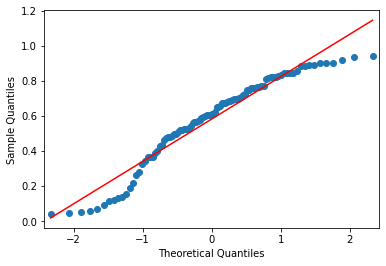

In [4]:
from statsmodels.graphics.gofplots import qqplot
from matplotlib import pyplot

qqplot(df['TFIDF'], line='s')
pyplot.show()

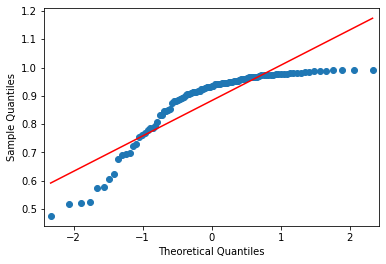

In [5]:
qqplot(df['W2V'], line='s')
pyplot.show()

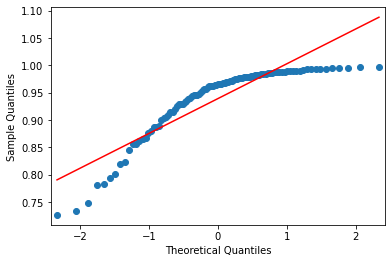

In [6]:
qqplot(df['SpaCy'], line='s')
pyplot.show()

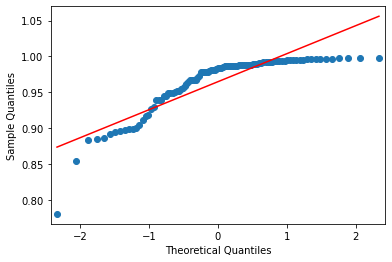

In [7]:
qqplot(df['FastText'], line='s')
pyplot.show()

In [9]:
stats.ttest_rel(a = df['TFIDF'],
                b = df['SpaCy'])

Ttest_relResult(statistic=-18.916787808457283, pvalue=8.265458451491365e-35)

In [10]:
stats.ttest_rel(a = df['TFIDF'],
                b = df['FastText'])

Ttest_relResult(statistic=-18.202810292029763, pvalue=1.643419586454753e-33)

In [11]:
import pingouin as pt

pt.ttest(x = df['TFIDF'], y = df['W2V'], paired=True)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-21.426025,100,two-sided,3.708840e-39,"[-0.33, -0.27]",1.566786,6.294e+35,1.0


In [12]:
pt.ttest(x = df['TFIDF'], y = df['SpaCy'], paired=True)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-18.916788,100,two-sided,8.265458e-35,"[-0.4, -0.32]",2.020202,3.269e+31,1.0


In [13]:
pt.ttest(x = df['TFIDF'], y = df['FastText'], paired=True)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-18.20281,100,two-sided,1.643420e-33,"[-0.43, -0.34]",2.209341,1.721e+30,1.0


In [14]:
pt.wilcoxon(x = df['TFIDF'], y = df['W2V'], alternative='two-sided')

,W-val,alternative,p-val,RBC,CLES
Wilcoxon,0.0,two-sided,2.705328e-18,-1.0,0.104205


In [15]:
stats.wilcoxon(x = df['TFIDF'], y = df['FastText'])

WilcoxonResult(statistic=0.0, pvalue=2.6651409486700556e-18)

In [16]:
pt.wilcoxon(x = df['TFIDF'], y = df['SpaCy'], alternative='two-sided')

,W-val,alternative,p-val,RBC,CLES
Wilcoxon,0.0,two-sided,2.705328e-18,-1.0,0.034899


In [17]:
pt.wilcoxon(x = df['TFIDF'], y = df['FastText'], alternative='two-sided')

,W-val,alternative,p-val,RBC,CLES
Wilcoxon,0.0,two-sided,2.705328e-18,-1.0,0.011077


In [18]:
import pingouin as pg

pg.normality(df['TFIDF'])

,W,pval,normal
TFIDF,0.934425,0.000082,False


In [19]:
pg.normality(df['W2V'])

,W,pval,normal
W2V,0.773257,3.491823e-11,False


In [20]:
pg.normality(df['SpaCy'])

,W,pval,normal
SpaCy,0.793411,1.356148e-10,False


In [21]:
pg.normality(df['FastText'])

,W,pval,normal
FastText,0.771593,3.133412e-11,False


C:\Users\biadge\AppData\Roaming\Python\Python37\site-packages\outdated\utils.py:18: OutdatedCheckFailedWarning: Failed to check for latest version of package.
Set the environment variable OUTDATED_RAISE_EXCEPTION=1 for a full traceback.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  **kwargs
